In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px

In [2]:
df4 = pd.read_csv("Customer Dataset/df4.csv")
df4.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.000000,12


In [3]:
df4.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000
mean,1564.551079,0.877457,1004.304941,592.967371,411.337570,979.140041,0.490621,0.202629,0.364596,0.135189,3.249832,14.722657,4493.662283,1730.993429,0.153722,11.517669
std,2080.076630,0.236706,2137.516314,1660.535715,904.675181,2097.626310,0.401330,0.298413,0.397472,0.200185,6.826872,24.865058,3637.280168,2881.747967,0.292572,1.337588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,6.000000
25%,128.494309,0.888889,40.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.417455,0.000000,12.000000
50%,874.387676,1.000000,363.280000,39.000000,89.365000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.298191,0.000000,12.000000
75%,2054.830733,1.000000,1110.945000,578.510000,468.912500,1113.910415,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1902.779562,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,1.000000,12.000000


<span style="font-size:20px; font-weight:bold;color:blue;">EDA </span>

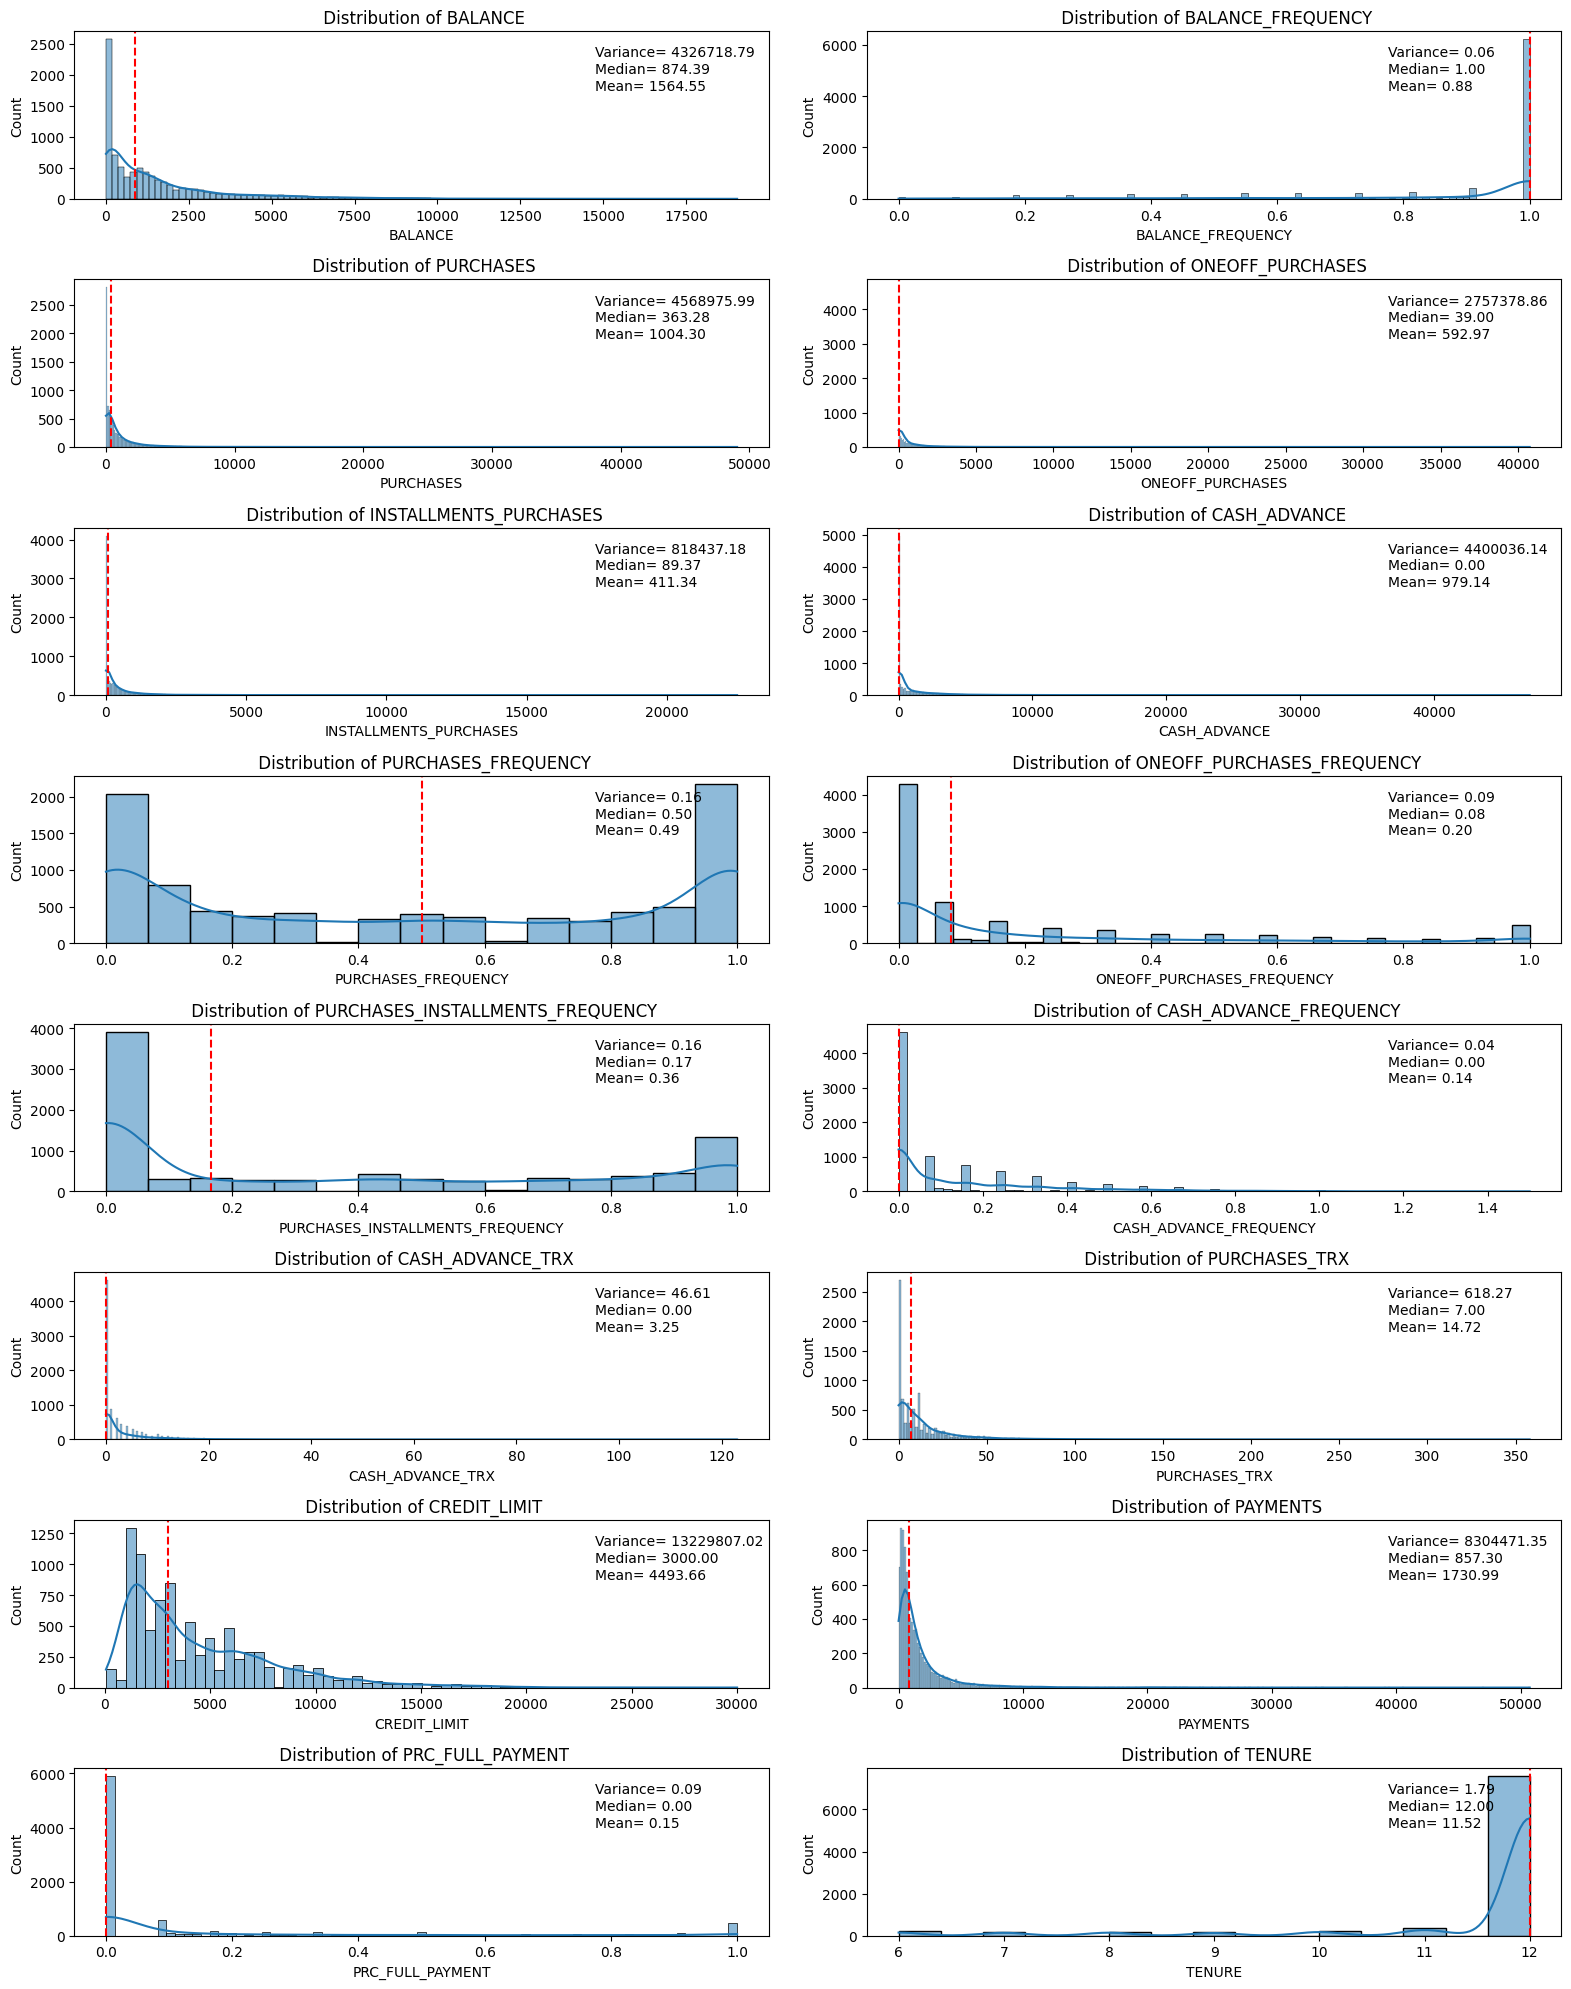

In [4]:
fig,axes=plt.subplots(8,2,figsize=(16,20))
axes=axes.flatten()
for i, col in enumerate (df4.columns[1:]):
    sns.histplot(data=df4,x=col,kde=True, ax=axes[i])
    median=df4[col].median()
    variance=df4[col].var()#
    mean=df4[col].mean()
    axes[i].text(0.75,0.85,f'Variance= {variance:.2f}', transform=axes[i].transAxes)
    axes[i].axvline(median, color='red',linestyle='--', label=f'median: {median:.2f}')
    axes[i].text(0.75,0.75, f'Median= {median:.2f}',transform=axes[i].transAxes)
    axes[i].text(0.75,0.65, f'Mean= {mean:.2f}',transform=axes[i].transAxes)
    axes[i].set_title(f' Distribution of {col}')
plt.tight_layout()
plt.savefig("Customer Dataset Figures/Data Processing/EDA.png",
            dpi=300, bbox_inches='tight')
plt.show()

+ All data are right-skewed. To have a better model, our preference is to have a normally distributed data set. What we can do is convert all features to logs, and we may have normally distributed data.

In [5]:
df5=df4.copy()
for col in df5.columns[1:]:
    df5[col]=np.log1p(df5[col])

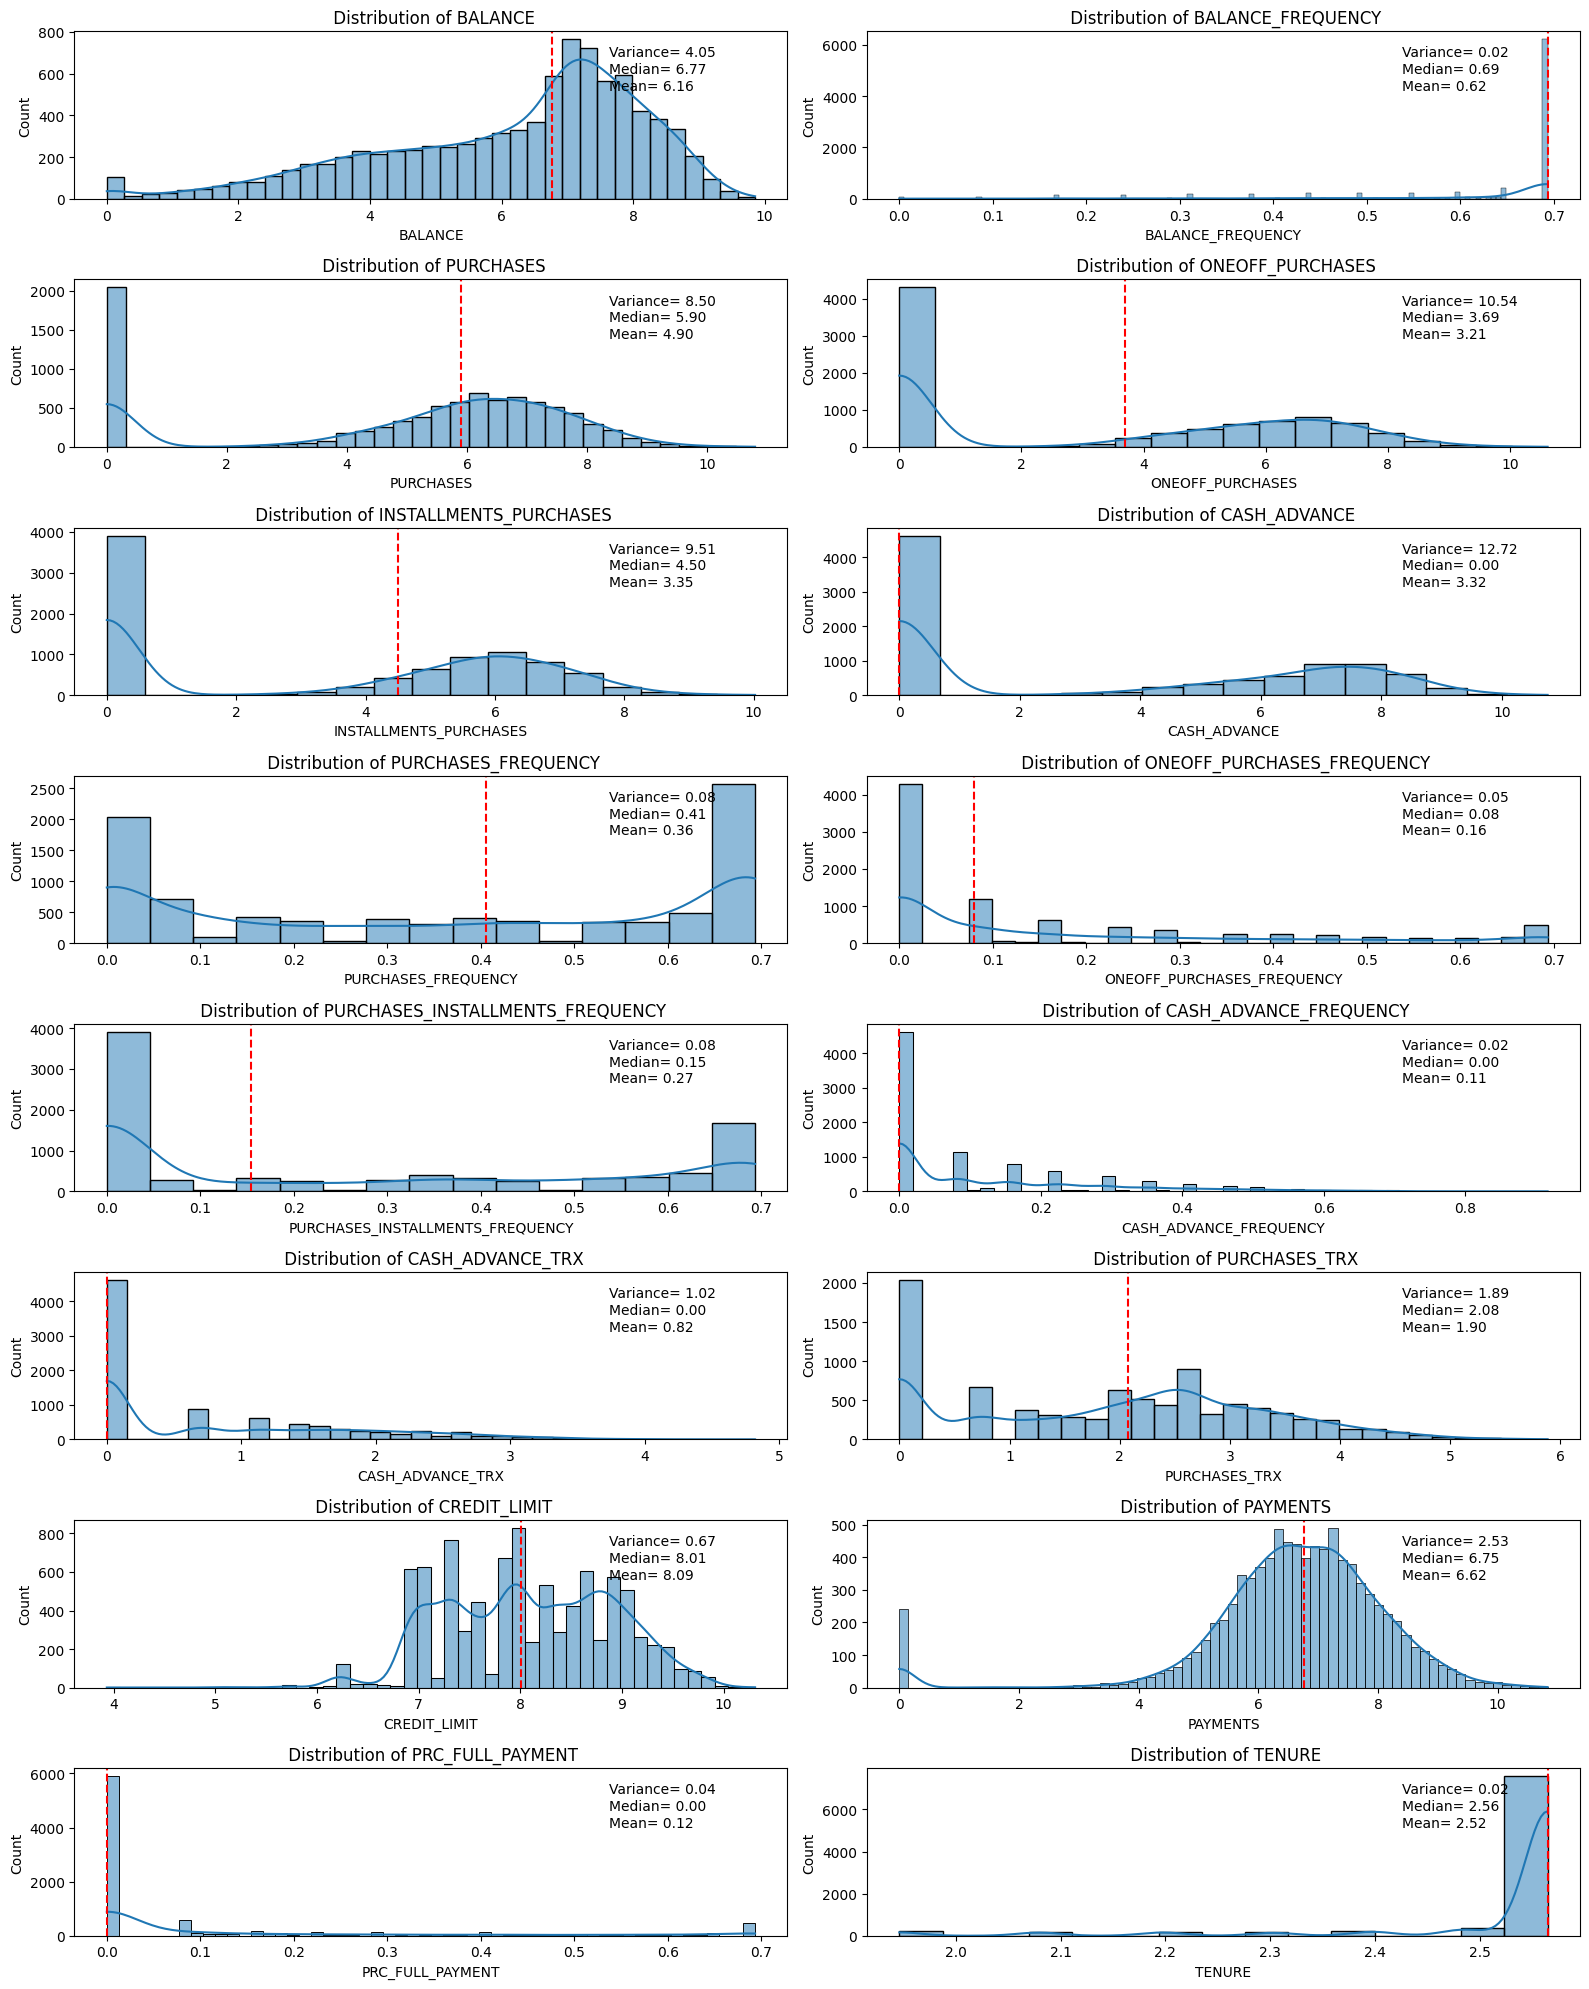

In [6]:
fig,axes=plt.subplots(8,2,figsize=(16,20))
axes=axes.flatten()
for i, col in enumerate (df5.columns[1:]):
    sns.histplot(data=df5,x=col,kde=True, ax=axes[i])
    median=df5[col].median()
    variance=df5[col].var()#
    mean=df5[col].mean()
    axes[i].text(0.75,0.85,f'Variance= {variance:.2f}', transform=axes[i].transAxes)
    axes[i].axvline(median, color='red',linestyle='--', label=f'median: {median:.2f}')
    axes[i].text(0.75,0.75, f'Median= {median:.2f}',transform=axes[i].transAxes)
    axes[i].text(0.75,0.65, f'Mean= {mean:.2f}',transform=axes[i].transAxes)
    axes[i].set_title(f' Distribution of {col}')
plt.tight_layout()
plt.savefig("Customer Dataset Figures/Data Processing/Distribution.png",
            dpi=300, bbox_inches='tight')
plt.show()

The features are not quite well distributed, but they are a bit improved, so we continue with the modified dataset, but only for clustering. For visualisation, we stick to the original dataset.

Let's explore the data

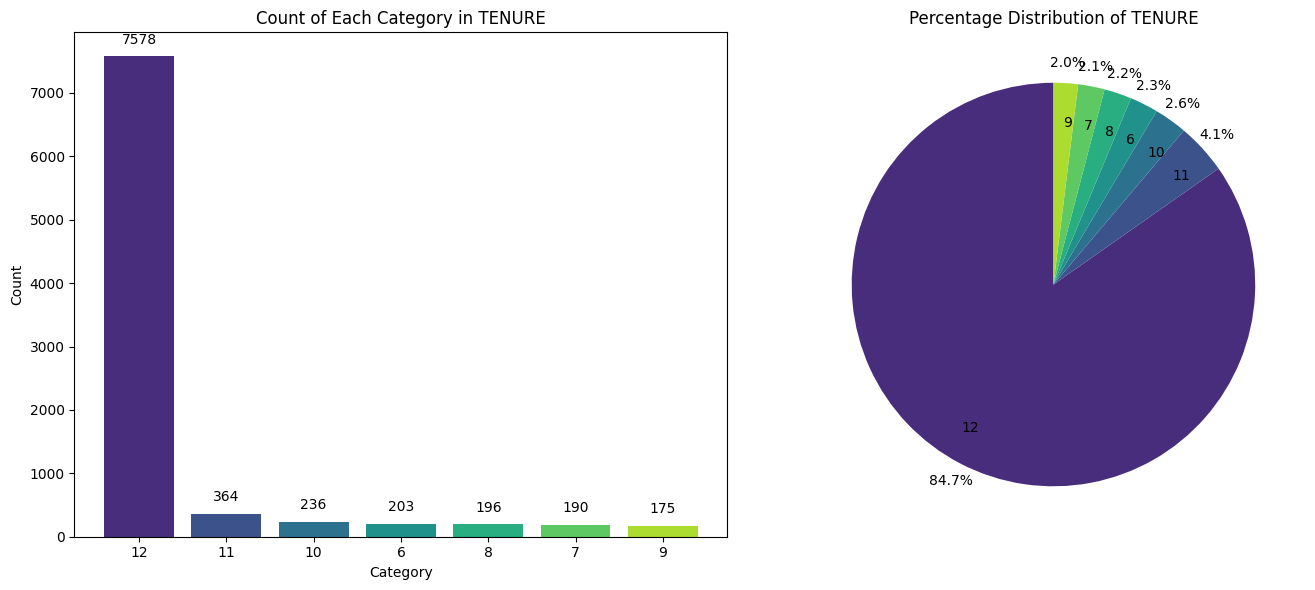

In [7]:
counts = df4['TENURE'].value_counts(dropna=False)
labels = counts.index.astype(str)   
values = counts.values
colors = sns.color_palette('viridis', len(labels))
color_map = dict(zip(labels, colors))
bar_colors = [color_map[l] for l in labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].bar(labels, values, color=bar_colors)
axes[0].set_title('Count of Each Category in TENURE')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Category')
# Count labels 
for i, v in enumerate(values):
    axes[0].text(i, v + max(values) * 0.02, str(v),
                 ha='center', va='bottom', fontsize=10)

axes[1].pie(
    values,
    labels=labels,
    colors=bar_colors,
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=1.1,     
    labeldistance=0.8,  
    textprops={'fontsize': 10}
)
axes[1].set_title('Percentage Distribution of TENURE')

plt.tight_layout()
plt.savefig("Customer Dataset Figures/Data Processing/Tenure Distribution.png",
            dpi=300, bbox_inches='tight')
plt.show()

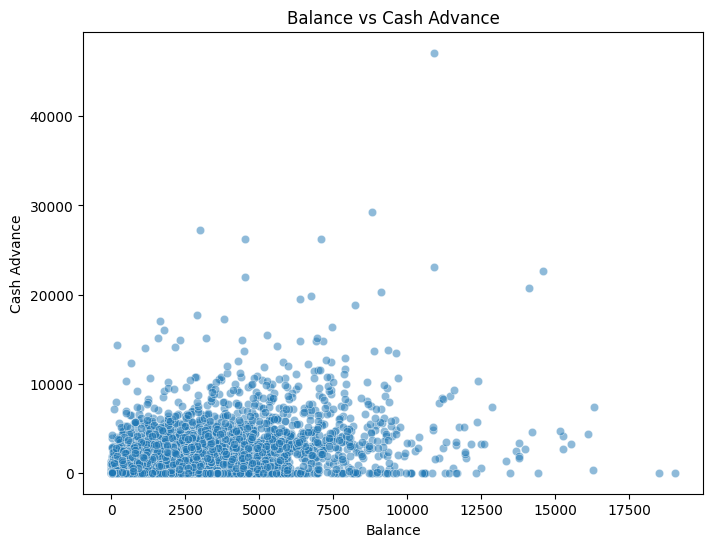

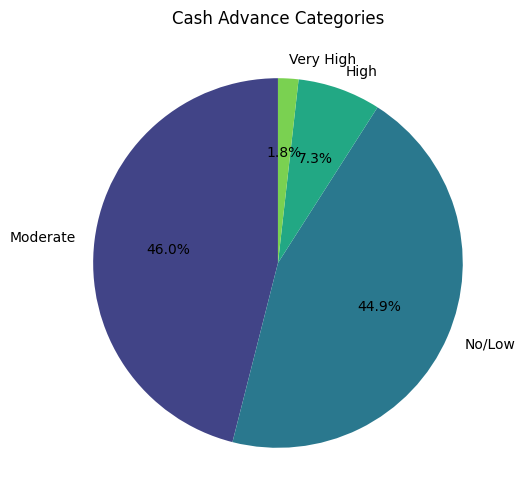

In [8]:
# Scatter plot: Balance vs Cash Advance
plt.figure(figsize=(8,6))
sns.scatterplot(data=df4, x='BALANCE', y='CASH_ADVANCE', alpha=0.5)
plt.title('Balance vs Cash Advance')
plt.xlabel('Balance')
plt.ylabel('Cash Advance')
plt.show()
# Pie chart: Cash Advance categories
bins = [0, 1000, 5000, 10000, df4['CASH_ADVANCE'].max()]
labels = ['No/Low', 'Moderate', 'High', 'Very High']
df4['CashAdvanceCategory'] = pd.cut(df4['CASH_ADVANCE'], bins=bins, labels=labels)
counts = df4['CashAdvanceCategory'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('viridis', len(counts)))
plt.title('Cash Advance Categories')
plt.savefig("Customer Dataset Figures/Data Processing/Balance-Cash Advancce.png",
            dpi=300, bbox_inches='tight')
plt.show()

Only 1,8% pay cash in high amounts and 46% pay cash in moderate and there is some negative correlation between cash advance and balance. Meaning that they pay cash, the account balance after purchase also be more.

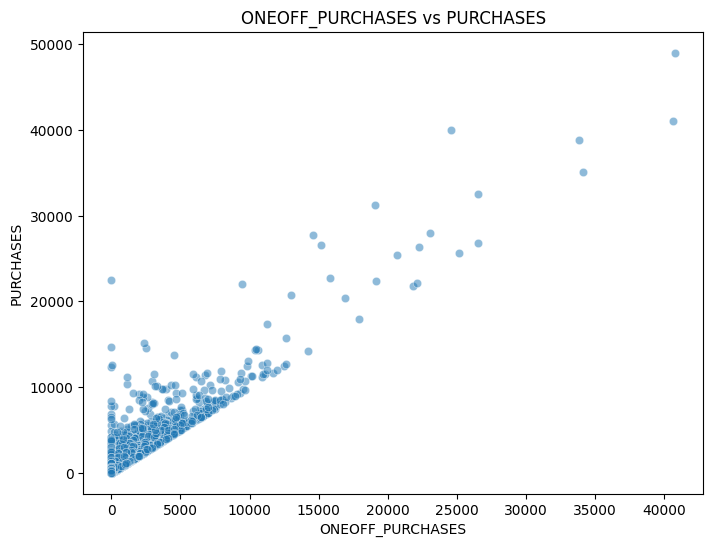

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df4, x='ONEOFF_PURCHASES', y='PURCHASES', alpha=0.5)
plt.title('ONEOFF_PURCHASES vs PURCHASES')
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('PURCHASES')
plt.savefig("Customer Dataset Figures/Data Processing/Purchases.png",
            dpi=300, bbox_inches='tight')
plt.show()

In [10]:
df5.to_csv("Customer Dataset/df5.csv", index=False)